In [218]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
%matplotlib inline

## Soal
Perusahaan ritel “Lantjar Djaja” ingin memahami perilaku pembelian pelanggan (khususnya, jumlah pembelian) terhadap berbagai produk dari berbagai kategori. Mereka telah membagikan ringkasan pembelian berbagai pelanggan untuk produk volume tinggi terpilih dari bulan lalu. Kumpulan data juga berisi demografi pelanggan (age, gender, marital status, city_type, stay_in_current_city), detail produk (product_id dan product category) dan Total purchase_amount dari bulan lalu.

Sekarang, mereka ingin membuat model untuk memprediksi jumlah pembelian pelanggan terhadap berbagai produk yang akan membantu mereka membuat penawaran yang dipersonalisasi untuk pelanggan terhadap produk yang berbeda.

In [179]:
# mengimport dataset
df_train = pd.read_csv("dataset/b_f_train.csv")
df_train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [180]:
# mengimport dataset
df_test = pd.read_csv("dataset/b_f_test.csv")
df_test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [181]:
#Merge both train and test data
df=pd.concat([df_train,df_test])
# df.head()

In [182]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,7.836670e+05,783667.000000,783667.000000,783667.000000,537685.000000,237858.000000,550068.000000
mean,1.003029e+06,8.079300,0.409777,5.366196,9.844506,12.668605,9263.968713
std,1.727267e+03,6.522206,0.491793,3.878160,5.089093,4.125510,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001519e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003075e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [183]:
# menghilangkan kolum yang tidak terpakai
df.drop(['User_ID'], axis=1, inplace=True)

In [184]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [185]:
df['Gender']=pd.get_dummies(df['Gender'],drop_first=1)

In [186]:
# menangani categorical features (gender)
df['Gender'].map({'M':1,'F':0})
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,False,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,False,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,False,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,False,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,True,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [187]:
# menangani categorical features (age)
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [188]:
# menangani categorical features (age) cara 1
# df['Age'].map({'0-17':1,'18-25':2,'26-35':3,'36-45':4,'46-50':5,'51-55':6,'55+':7})

In [189]:
# teknik ke dua
label_encoder = preprocessing.LabelEncoder()

df['Age']=label_encoder.fit_transform(df['Age'])

df['Age'].unique()


array([0, 6, 2, 4, 5, 3, 1])

In [190]:
# merapihkan categorical city category
df_city = pd.get_dummies(df['City_Category'],drop_first=True)
df_city.head()


,B,C
0,False,False
1,False,False
2,False,False
3,False,False
4,False,True


In [191]:
# menggabungkan dataframe lama dengan dataframe city category
df = pd.concat([df,df_city], axis=1)
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,False,0,10,A,2,0,3,NaN,NaN,8370.0,False,False
1,P00248942,False,0,10,A,2,0,1,6.0,14.0,15200.0,False,False
2,P00087842,False,0,10,A,2,0,12,NaN,NaN,1422.0,False,False
3,P00085442,False,0,10,A,2,0,12,14.0,NaN,1057.0,False,False
4,P00285442,True,6,16,C,4+,0,8,NaN,NaN,7969.0,False,True


In [192]:
# drop city category
df.drop('City_Category', axis=1, inplace=True)

In [193]:
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,False,0,10,2,0,3,NaN,NaN,8370.0,False,False
1,P00248942,False,0,10,2,0,1,6.0,14.0,15200.0,False,False
2,P00087842,False,0,10,2,0,12,NaN,NaN,1422.0,False,False
3,P00085442,False,0,10,2,0,12,14.0,NaN,1057.0,False,False
4,P00285442,True,6,16,4+,0,8,NaN,NaN,7969.0,False,True


### Mencari Missing Value

In [194]:
# mengecek null value dari dataframe
df.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
B                                  0
C                                  0
dtype: int64

In [195]:
# replace missing value product 2
df['Product_Category_2'].unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [196]:
# menghitung total data
df['Product_Category_2'].value_counts()

Product_Category_2
8.0     91317
14.0    78834
2.0     70498
16.0    61687
15.0    54114
5.0     37165
4.0     36705
6.0     23575
11.0    20230
17.0    19104
13.0    15054
9.0      8177
12.0     7801
10.0     4420
3.0      4123
18.0     4027
7.0       854
Name: count, dtype: int64

In [197]:
# replace missing value product category 2 dengan nilai modus
df['Product_Category_2']=df['Product_Category_2'].fillna(df['Product_Category_2'].mode()[0])

In [198]:
# mengecek null data
df['Product_Category_2'].isnull().sum()

0

In [199]:
# replace missing value product 3
df['Product_Category_3'].unique()

array([nan, 14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3.,
       18., 11., 10.])

In [200]:
# replace missing value product category 3 dengan nilai modus
df['Product_Category_3']=df['Product_Category_3'].fillna(df['Product_Category_3'].mode()[0])

In [201]:
# df.head()

In [202]:
# mereplace isi dari Stay_In_Current_City_Years
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].str.replace('+', '')

In [203]:
# convert tipe data Stay_In_Current_City_Years dari object ke integer
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].astype(int)
# df.info()

In [204]:
# convert uint8 ke integer
df['B']=df['B'].astype(int)
df['C']=df['C'].astype(int)

In [205]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  bool   
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  int64  
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  float64
 8   Product_Category_3          783667 non-null  float64
 9   Purchase                    550068 non-null  float64
 10  B                           783667 non-null  int64  
 11  C                           783667 non-null  int64  
dtypes: bool(1), float64(3), int64(7), object(1)
memory usage: 72.5+ MB


In [206]:
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,False,0,10,2,0,3,8.0,16.0,8370.0,0,0
1,P00248942,False,0,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,False,0,10,2,0,12,8.0,16.0,1422.0,0,0
3,P00085442,False,0,10,2,0,12,14.0,16.0,1057.0,0,0
4,P00285442,True,6,16,4,0,8,8.0,16.0,7969.0,0,1


## Visualisasi

<Axes: xlabel='Age', ylabel='Purchase'>

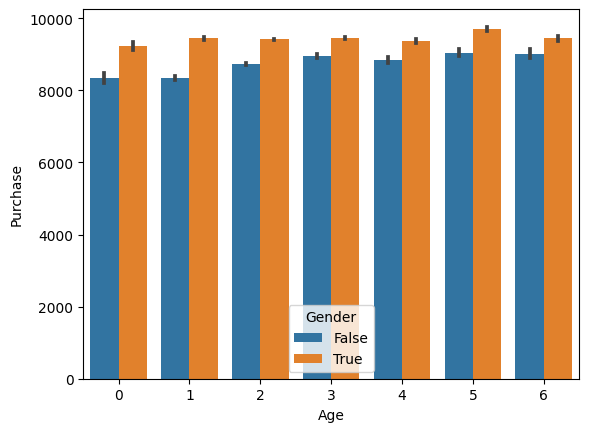

In [207]:
# visualisasi belanja berdasarkan umur dan gender
sns.barplot(x='Age',y='Purchase',hue='Gender',data=df)

## Hasil Pengamatan
> Lebih banyak laki laki yang berbelanja online di toko ini daripada perempuan

<Axes: xlabel='Occupation', ylabel='Purchase'>

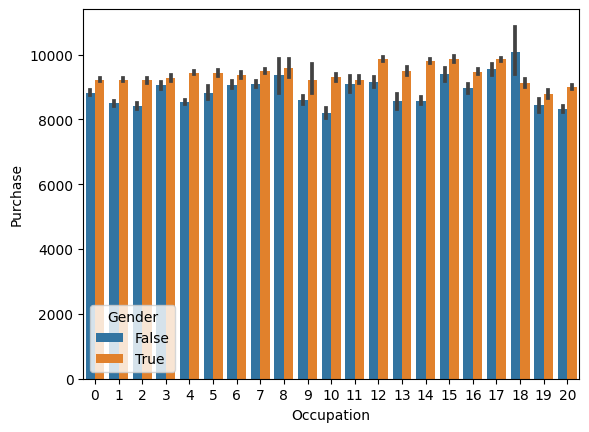

In [208]:
# visualisasi data belanja dengan pekerjaan pembeli
sns.barplot(x='Occupation',y='Purchase',hue='Gender',data=df)

<Axes: xlabel='Product_Category_1', ylabel='Purchase'>

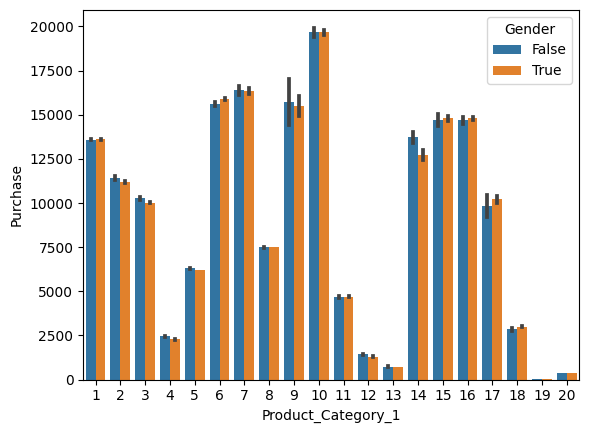

In [210]:
# visualisasi belanja berdasarkan produk kategori 1
sns.barplot(x='Product_Category_1',y='Purchase',hue='Gender',data=df)

<Axes: xlabel='Product_Category_2', ylabel='Purchase'>

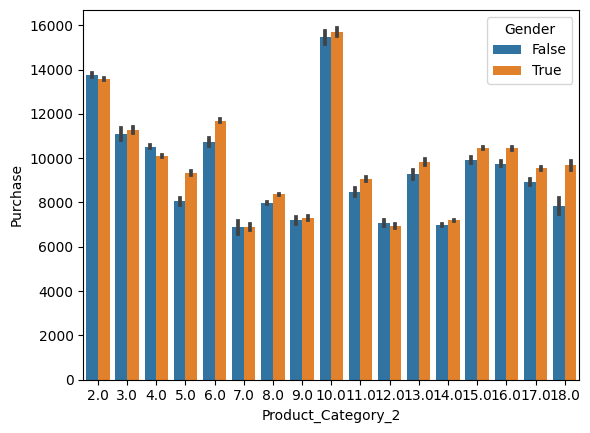

In [211]:
# visualisasi belanja berdasarkan produk kategori 2
sns.barplot(x='Product_Category_2',y='Purchase',hue='Gender',data=df)

<Axes: xlabel='Product_Category_3', ylabel='Purchase'>

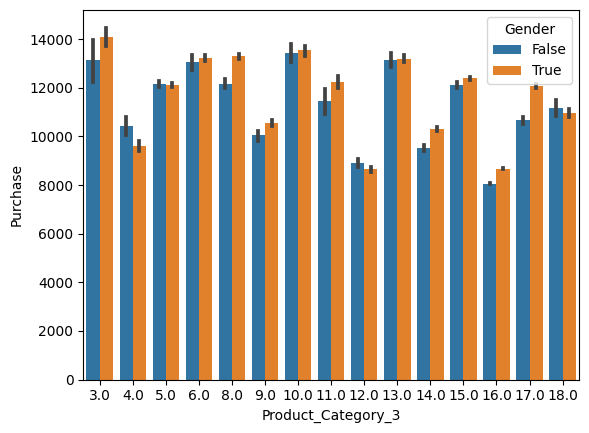

In [212]:
# visualisasi belanja berdasarkan produk kategori 3
sns.barplot(x='Product_Category_3',y='Purchase',hue='Gender',data=df)

## Feature Scaling

In [215]:
df_test = df[df['Purchase'].isnull()]

In [216]:
df_train = df[~df['Purchase'].isnull()]

In [221]:
x = df_train.drop('Purchase', axis=1)
y = df_train['Purchase']

In [222]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [ ]:
X_train.drop('Product_ID',axis=1,inplace=True)
X_test.drop('Product_ID',axis=1,inplace=True)

In [ ]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)